In [1]:
import pyomo.environ as pyo

In [2]:
import numpy as np
import pandas as pd



In [3]:
data = pd.read_csv("DebrisFlow.txt",sep ='\t',header = None)

In [92]:
model = pyo.ConcreteModel()

In [93]:
M = [max( abs(data.iloc[i][1] - 0.29*data.iloc[i][0]-25) , abs(data.iloc[i][1] - 0.29*data.iloc[i][0]+94),
        abs(data.iloc[i][1]-25) , abs(data.iloc[i][1] +94)) for i in range(len(data))]

In [94]:
I = np.arange(len(data)) +1

In [95]:
model.Iset = pyo.Set(initialize=I)
model.I = pyo.Param(initialize=len(data))

In [96]:
def rule_x(model,i):
    return data.iloc[i-1][0]
def rule_y(model,i):
    return data.iloc[i-1][1]

In [97]:
B = np.arange(4)+1

In [98]:
model.Bset = pyo.Set(initialize=B)
model.B = pyo.Param(initialize=len(B))

In [99]:
model.X = pyo.Param(model.Iset,initialize=rule_x)

In [100]:
model.Y = pyo.Param(model.Iset,initialize=rule_y)

In [101]:
model.c = pyo.Var(model.Bset,domain=pyo.Reals)

In [102]:
model.d = pyo.Var(model.Bset,domain=pyo.Reals)

In [103]:
model.eps = pyo.Var(model.Iset,domain = pyo.NonNegativeReals)

In [104]:
model.delta = pyo.Var(model.Iset,model.Bset,domain = pyo.Binary)

In [105]:
def M_rule(model,i):
    return M[i-1]

In [106]:
model.M = pyo.Param(model.Iset,initialize=M_rule)

In [107]:
def rule_const1(model,i,b):
    return model.Y[i] - model.c[b]*model.X[i] - model.d[b] <= model.eps[i] + 133*(1-model.delta[i,b])

In [108]:
model.const1 = pyo.Constraint(model.Iset,model.Bset,rule = rule_const1)

In [109]:
def rule_const2(model,i,b):
    return -1*model.Y[i] + model.c[b]*model.X[i] + model.d[b] <= model.eps[i] + 133*(1-model.delta[i,b])

In [110]:
model.const2 = pyo.Constraint(model.Iset,model.Bset,rule=rule_const2)

In [111]:
def rule_const3(model,i):
    return sum(model.delta[i,b] for b in model.Bset) == 1

In [112]:
model.const3 = pyo.Constraint(model.Iset,rule=rule_const3)

In [113]:
def rule_const_4(model,i,b):
    
    if i==model.I:
        return pyo.Constraint.Skip
    
    if b == model.B:
        return pyo.Constraint.Skip
    
    return model.delta[i+1,b+1] <= model.delta[i,b] + model.delta[i,b+1]

In [114]:
model.const4 = pyo.Constraint(model.Iset,model.Bset,rule = rule_const_4)

In [115]:
def rule_const_5(model,i):
    
    if i==model.I:
        return pyo.Constraint.Skip
 
    
    return model.delta[i+1,1] <= model.delta[i,1] 

In [116]:
model.const5 = pyo.Constraint(model.Iset,rule = rule_const_5)

In [117]:
def rule_const_6(model,i):
    
    if i==model.I:
        return pyo.Constraint.Skip
 
    
    return model.delta[i,model.B] <= model.delta[i+1,model.B] 

In [118]:
model.const6 = pyo.Constraint(model.Iset, rule = rule_const_6)

In [119]:
def rule_obj(model):
    return sum(model.eps[i] for i in model.Iset)

In [120]:
model.obj = pyo.Objective(rule=rule_obj,sense = pyo.minimize)

In [121]:
solver = pyo.SolverFactory('glpk')

In [122]:
opt = {'tmlim':600}

In [123]:
result = solver.solve(model, options = opt)

In [124]:
c = [pyo.value(model.c[i]) for i in model.Bset]

In [125]:
d =[pyo.value(model.d[i]) for i in model.Bset]

In [126]:
lines = [[cc,dd] for cc,dd in zip(c,d)]

In [127]:
import matplotlib.pyplot as plt


In [128]:
cls = []
for i in range(1,len(data)+1):
    for j in range(1,5):
        if pyo.value(model.delta[i,j])==1:
            cls.append(j)
    

In [130]:
c_map={1:'blue',2:'orange',3:'green',4:'red'}

In [131]:
colors =[c_map[i] for i in cls]

# 4 clusters

In [133]:
print(result)


Problem: 
- Name: unknown
  Lower bound: 8.72272836821721
  Upper bound: 8.72272836821721
  Number of objectives: 1
  Number of constraints: 612
  Number of variables: 229
  Number of nonzeros: 2144
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1297
      Number of created subproblems: 1297
  Error rc: 0
  Time: 4.967264890670776
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



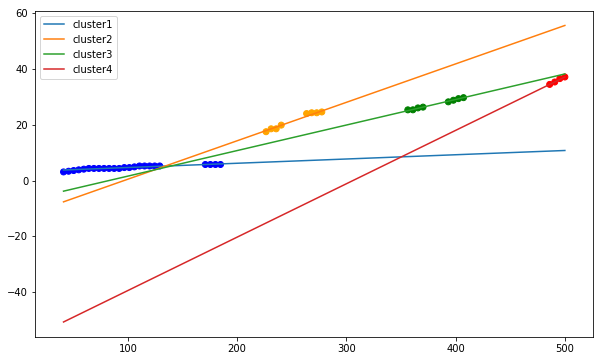

In [132]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  

plt.scatter(data[0],data[1],c=colors)

plt.show()


# 3 clusters

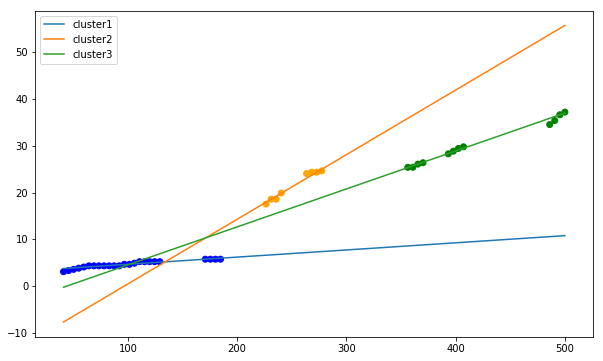

In [46]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  

plt.scatter(data[0],data[1],c=colors)

plt.show()


In [36]:
print(result)


Problem: 
- Name: unknown
  Lower bound: 11.1292384602922
  Upper bound: 11.1292384602922
  Number of objectives: 1
  Number of constraints: 481
  Number of variables: 183
  Number of nonzeros: 1619
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 167
      Number of created subproblems: 167
  Error rc: 0
  Time: 0.7241854667663574
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



# 2 clusters

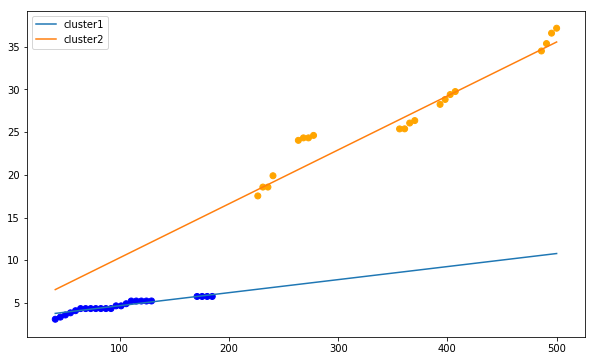

In [91]:
plt.figure(figsize=(10,6))
i=1
for cc,dd in zip(c,d):
    plt.plot(data[0],cc*data[0]+dd,label=f"cluster{i}")
    i+=1
plt.legend()  

plt.scatter(data[0],data[1],c=colors)

plt.show()

In [82]:
print(result)


Problem: 
- Name: unknown
  Lower bound: 28.1187557851495
  Upper bound: 28.1187557851495
  Number of objectives: 1
  Number of constraints: 350
  Number of variables: 137
  Number of nonzeros: 1094
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 47
      Number of created subproblems: 47
  Error rc: 0
  Time: 0.6661696434020996
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

